# Unitarity

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')


In [16]:
def mySqrt(z):
    return 1j*np.sqrt(-z)

# relative momentum in the CM frame
def q(s):                      
    return mySqrt(s-4)/2

# two-body phase space function in the case of identical particles
def rho(s):                     
    return q(s)/(8*np.pi*np.sqrt(s)*2) 

# K matrix in the effective range representation
def K_eff_range(s, a, r):
    return q(s)/(rho(s)*(-(1/a)+((r*q(s)**2)/2)))

# Gamma function of the Breit-Wigner representation
def Gamma(s, m0, g0):
    return g0**2*m0**2*q(s)/(6*np.pi*s)

# K matrix in the Breit-Wigner representation
def K_breit_wigner(s, m0, g0):
    return np.sqrt(s)*Gamma(s, m0, g0)/((m0**2-s)*rho(s))

# Amplitude for a given K matrix
def amplitude(s, Kmatrix):
    K = Kmatrix(s)
    return K/(1-1j*rho(s)*K)

Let us redo some of the previous plots just to check that our definitions are good.

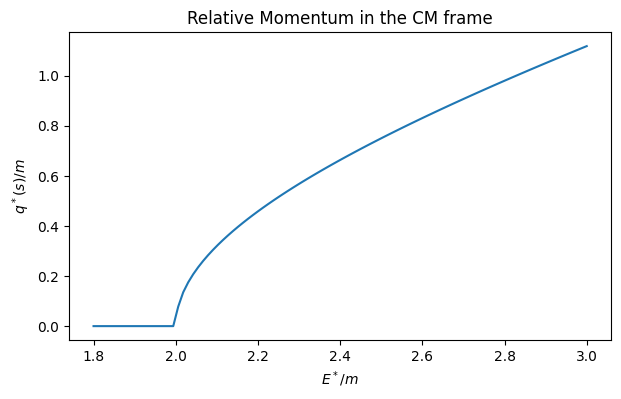

In [17]:
# energy range we have been asked to explore in these exercises
E = np.linspace(1.8, 3, 100) 
# small number we will use to avoid the cut of the square root
eps = 1e-16 

# relative momentum plot
fig, ax = plt.subplots(figsize = (7,4))
ax.plot(E, np.real(q(E**2+1j*eps)))
ax.set_xlabel(r'$E^*/m$')
ax.set_ylabel(r'$q^*(s)/m$')
ax.set_title(r'Relative Momentum in the CM frame')
plt.show(fig)

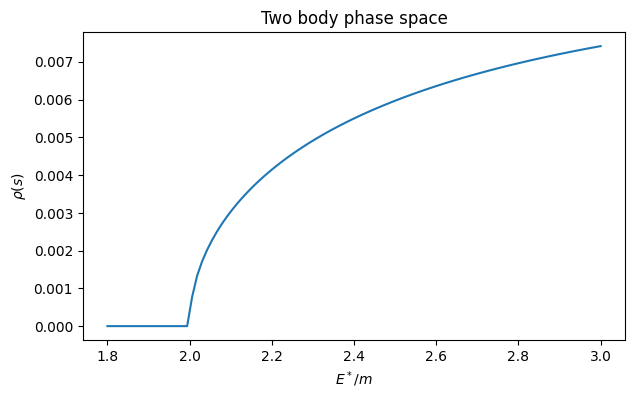

In [18]:
# phase space function plot

fig, ax = plt.subplots(figsize = (7,4))
ax.plot(E, np.real(rho(E**2+1j*eps)))
ax.set_xlabel(r'$E^*/m$')
ax.set_ylabel(r'$\rho(s)$')
ax.set_title(r'Two body phase space')
plt.show(fig)

Text(0, 0.5, '$\\mathcal{M}$')

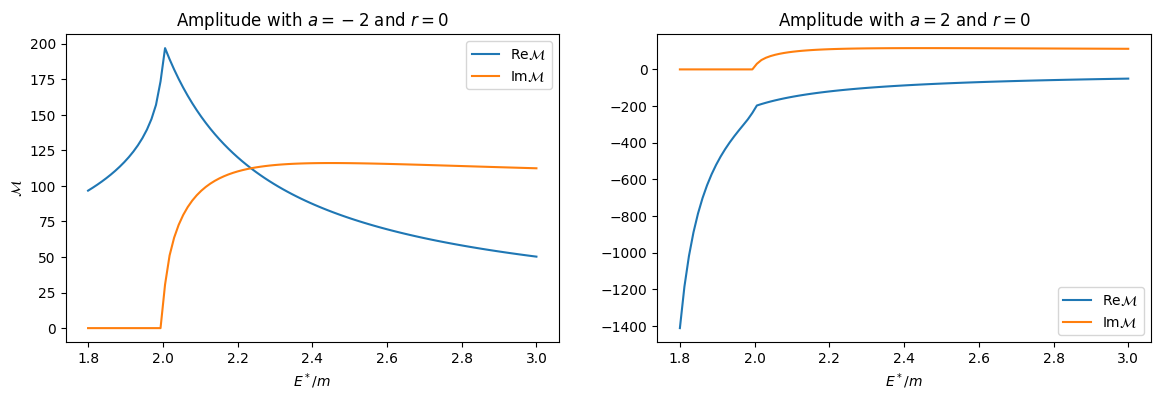

In [19]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.real(amplitude(E**2 + 1j*eps, lambda s: K_eff_range(s, a[i], r[i]))), label = r'Re$\mathcal{M}$')
    ax[i].plot(E, np.imag(amplitude(E**2 + 1j*eps, lambda s: K_eff_range(s, a[i], r[i]))), label = r'Im$\mathcal{M}$')
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'Amplitude with $a={}$ and $r={}$'.format(a[i], r[i]))  
    ax[i].legend()
    
ax[0].set_ylabel(r'$\mathcal{M}$')

Text(0, 0.5, '$\\mathcal{M}$')

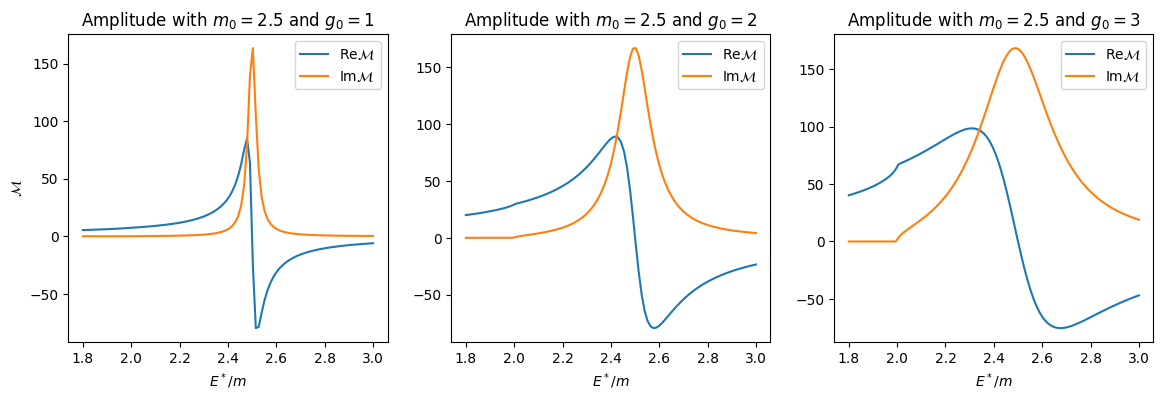

In [20]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.real(amplitude(E**2 + 1j*eps, lambda s: K_breit_wigner(s, m0[i], g0[i]))), label = r'Re$\mathcal{M}$')
    ax[i].plot(E, np.imag(amplitude(E**2 + 1j*eps, lambda s: K_breit_wigner(s, m0[i], g0[i]))), label = r'Im$\mathcal{M}$')
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'Amplitude with $m_0={}$ and $g_0={}$'.format(m0[i], g0[i]))  
    ax[i].legend()
    
ax[0].set_ylabel(r'$\mathcal{M}$')

Text(0.5, 0.92, 'Im$\\mathcal{M}$')

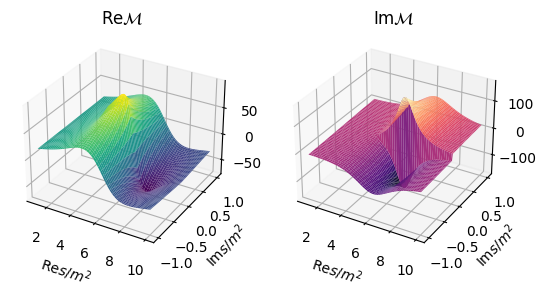

In [21]:
# Example of amplitude plot in the complex plane

X, Y = np.meshgrid(np.linspace(1, 10, 100), np.linspace(-1, 1, 100))
Z = X + 1j*Y

fig, ax = plt.subplots(nrows = 1, ncols = 2, subplot_kw ={'projection' : '3d'})
ax[0].plot_surface(X, Y, np.real(amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))), cmap = 'viridis')
ax[1].plot_surface(X, Y, np.imag(amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))), cmap = 'magma')
ax[0].set_xlabel(r'Re$s/m^2$')
ax[0].set_ylabel(r'Im$s/m^2$')
ax[1].set_xlabel(r'Re$s/m^2$')
ax[1].set_ylabel(r'Im$s/m^2$')
ax[0].set_title(r'Re$\mathcal{M}$')
ax[1].set_title(r'Im$\mathcal{M}$')

This is the result obtained in the example file but it heavily depends on which square roots are rotated and which aren't. It seem like the correct thing to do is to rotate the square root in the $q^*$ but not anywhere else.

### 3

Text(0.5, 0.98, 'Amplitudes for $m_0=2.5$ and $g_0=3$')

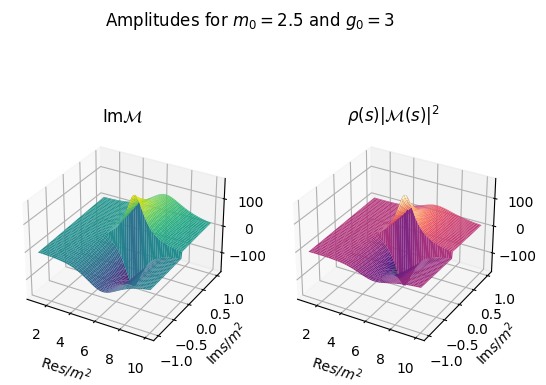

In [18]:
X, Y = np.meshgrid(np.linspace(1, 10, 100), np.linspace (-1, 1, 100))
Z = X + 1j*Y

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, subplot_kw = {"projection" : "3d"})
amplitudes = amplitude(Z, lambda s: K_breit_wigner(s, m0[2], g0[2]))
ax1.plot_surface(X, Y, np.imag(amplitudes), cmap = "viridis")
ax2.plot_surface(X, Y, rho(Z)*np.abs(amplitudes)**2, cmap = "magma")
ax1.set_xlabel(r"Re$s/m^2$")
ax2.set_xlabel(r"Re$s/m^2$")
ax1.set_ylabel(r"Im$s/m^2$")
ax2.set_ylabel(r"Im$s/m^2$")
ax1.set_title(r"Im$\mathcal{M}$")
ax2.set_title(r"$\rho(s)|\mathcal{M}(s)|^2$")
fig.suptitle(r"Amplitudes for $m_0={}m$ and $g_0={}$".format(m0[2],g0[2]))

#### 4

Text(0, 0.5, '$|\\rho(s)\\mathcal{M}(s)|$')

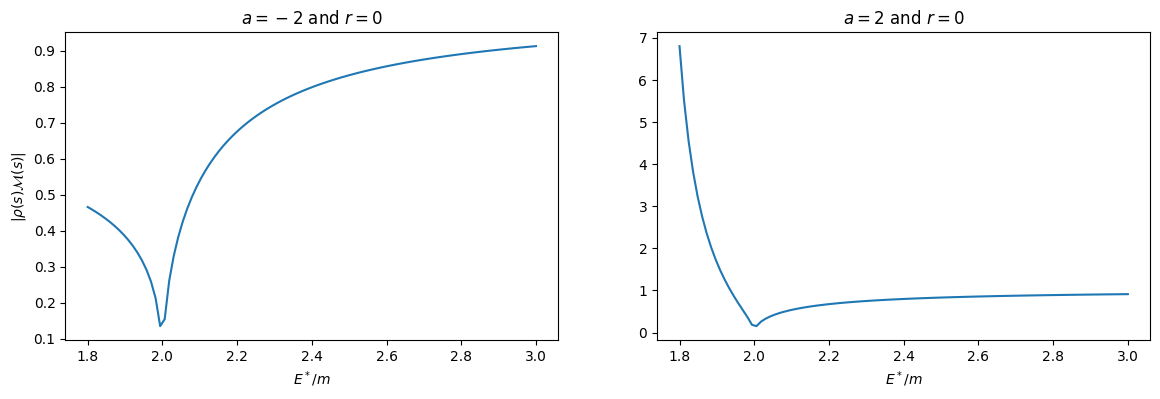

In [34]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 2):
    ax[i].plot(E, np.abs(rho(s)*amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r'$|\rho(s)\mathcal{M}(s)|$')

Text(0, 0.5, '$|\\rho(s)\\mathcal{M}(s)|$')

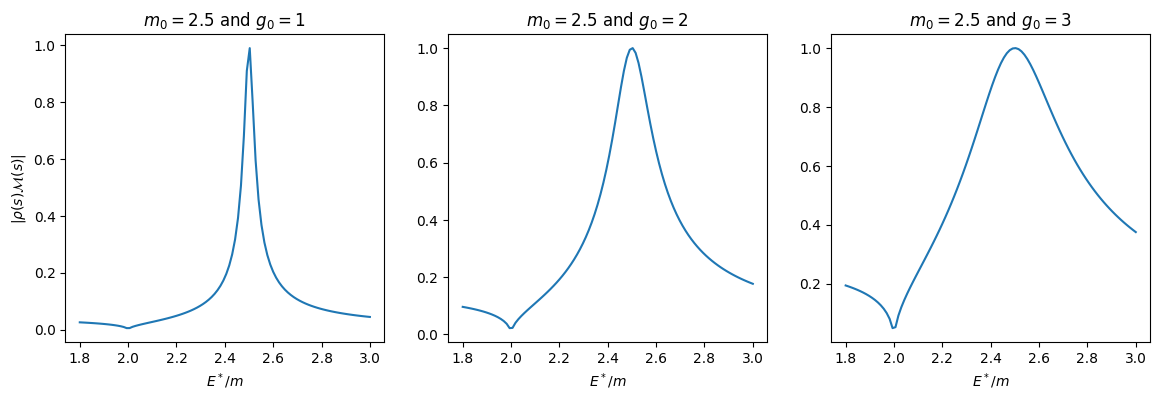

In [35]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 3):
    ax[i].plot(E, np.abs(rho(s)*amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}$ and $g_0={}$'.format(m0[i], g0[i]))  
    
ax[0].set_ylabel(r'$|\rho(s)\mathcal{M}(s)|$')

# Magnitudes and Phases

## 2

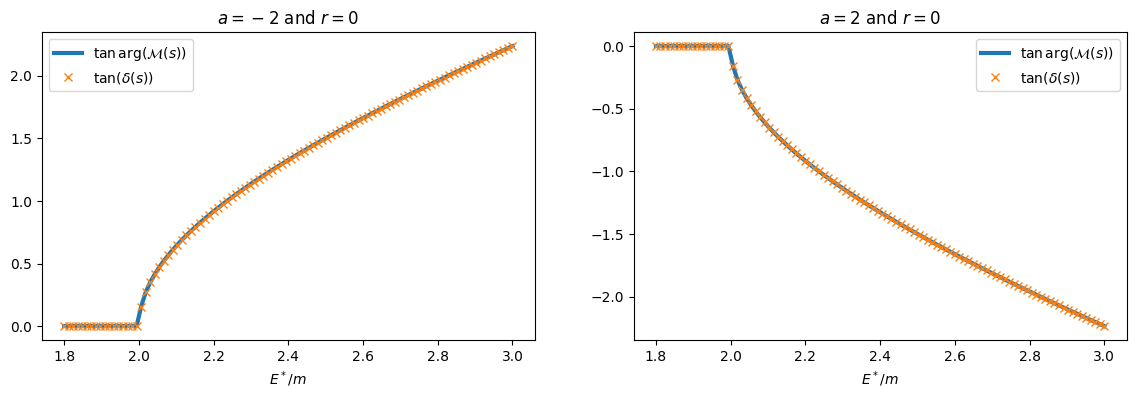

In [103]:
# plots for the effective range parametrization

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
s = E**2 + 1j*eps
for i in range (0, 2):
    ax[i].plot(E, np.tan(np.angle(amplitude(s, lambda s: K_eff_range(s, a[i], r[i])))), linewidth = 3, label = r"$\tan\arg(\mathcal{M}(s))$")
    ax[i].plot(E, (1/((((r[i]*q(s)**2)/2)-(1/a[i]))/q(s))), marker = "x", linewidth = 0, label = r"$\tan(\delta(s))$")
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    ax[i].legend()

One needs to be careful to use $\tan$ instead of $\cot$ for the comparision. Indeed, as we saw, below threshhold the phase is real, making $\cot$ explode. Alternatively we can compare the angles directly. This may however produce diferences by multiples of $2\pi$. 

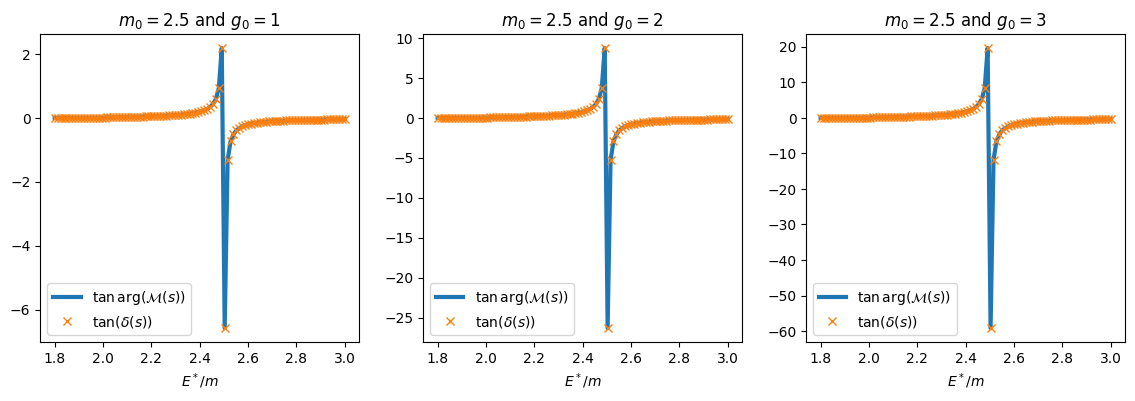

In [104]:
# plots for the Breit-Wigner parametrization

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.tan(np.angle(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i])))), linewidth = 3, label = r"$\tan\arg(\mathcal{M}(s))$")
    ax[i].plot(E, np.sqrt(s)*Gamma(s, m0[i], g0[i])/(m0[i]**2-s), marker = "x", linewidth = 0, label = r"$\tan(\delta(s))$")
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}$ and $g_0={}$'.format(m0[i], g0[i])) 
    ax[i].legend(loc = "lower left")

## 3

Text(0, 0.5, '$|\\mathcal{M}(s)|$')

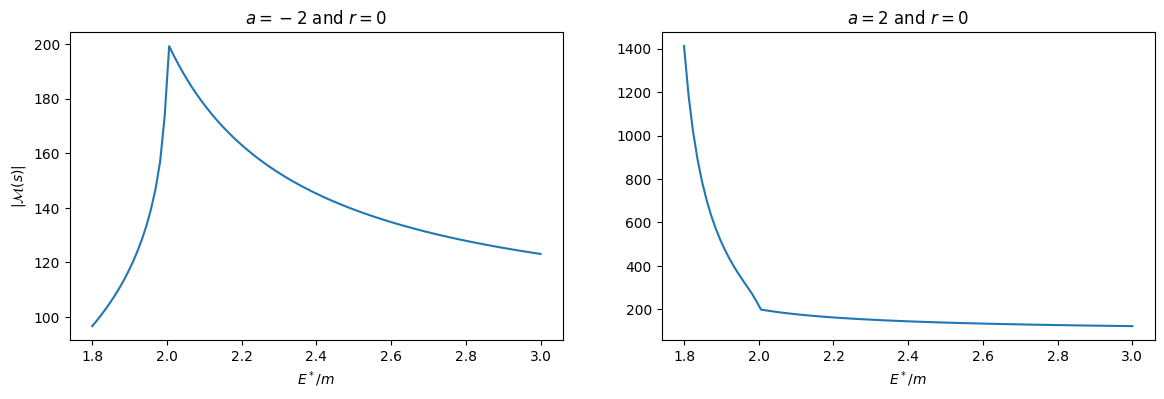

In [111]:
# magnitudes

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.abs(amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r"$|\mathcal{M}(s)|$")

Text(0, 0.5, '$\\arg\\mathcal{M}(s)$')

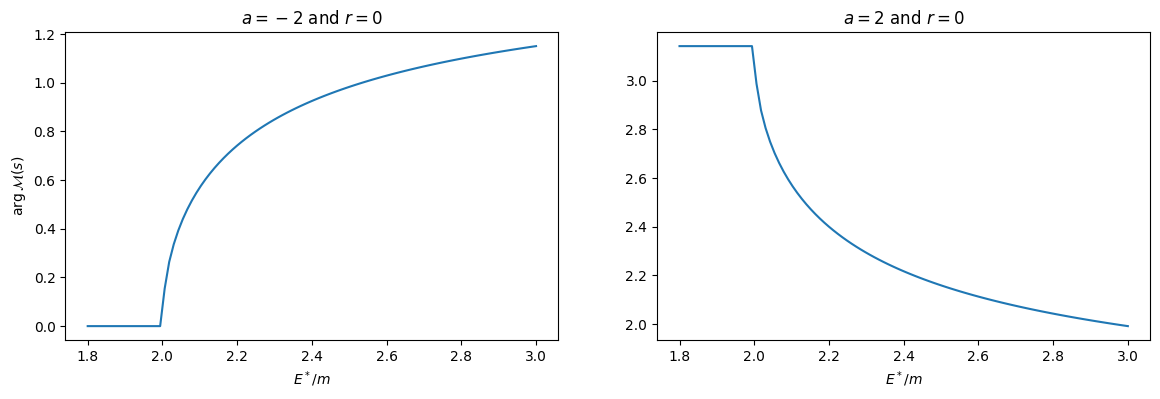

In [121]:
# angles

a = [-2, 2]
r = [0, 0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
for i in range (0, 2):
    ax[i].plot(E, np.angle(amplitude(s, lambda s: K_eff_range(s, a[i], r[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$a={}$ and $r={}$'.format(a[i], r[i]))  
    
ax[0].set_ylabel(r"$\arg\mathcal{M}(s)$")

## 4

Text(0, 0.5, '$|\\mathcal{M}(s)|$')

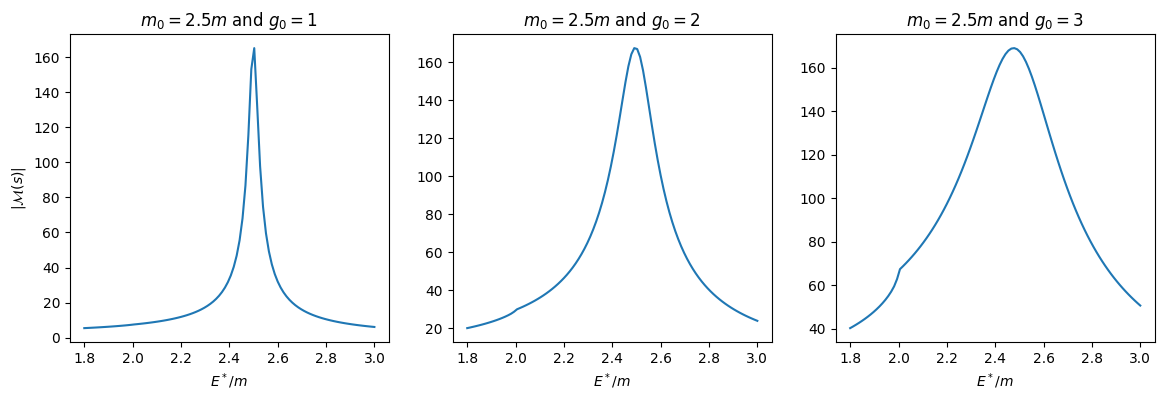

In [119]:
# magnitudes

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.abs(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}m$ and $g_0={}$'.format(m0[i], g0[i])) 
    
ax[0].set_ylabel(r"$|\mathcal{M}(s)|$")

Text(0, 0.5, '$\\arg\\mathcal{M}(s)$')

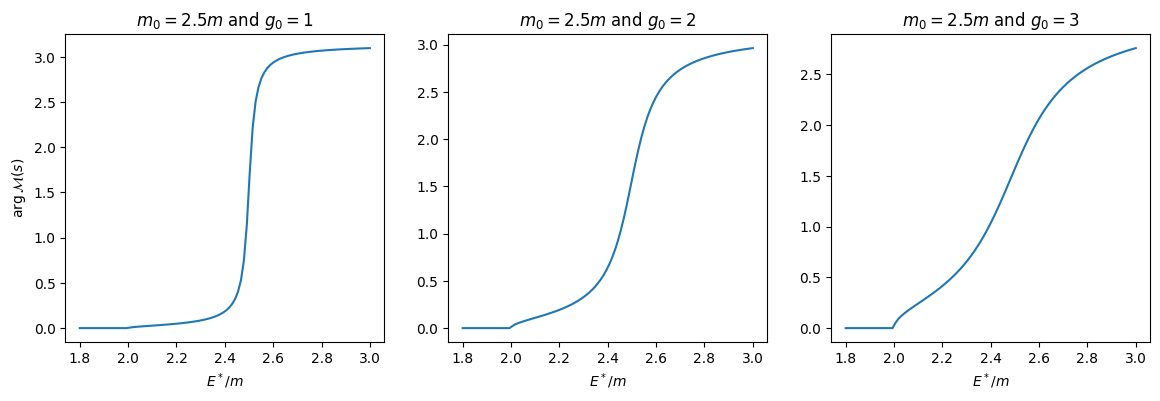

In [122]:
# angles

m0 = [2.5, 2.5, 2.5]
g0 = [1, 2, 3]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))
for i in range (0, 3):
    ax[i].plot(E, np.angle(amplitude(s, lambda s: K_breit_wigner(s, m0[i], g0[i]))))
    ax[i].set_xlabel(r'$E^*/m$')
    ax[i].set_title(r'$m_0={}m$ and $g_0={}$'.format(m0[i], g0[i])) 
    
ax[0].set_ylabel(r"$\arg\mathcal{M}(s)$")

# Bound, Virtual, and Resonant States

### 2

Text(0.5, 0.92, 'Im$\\rho(s)$')

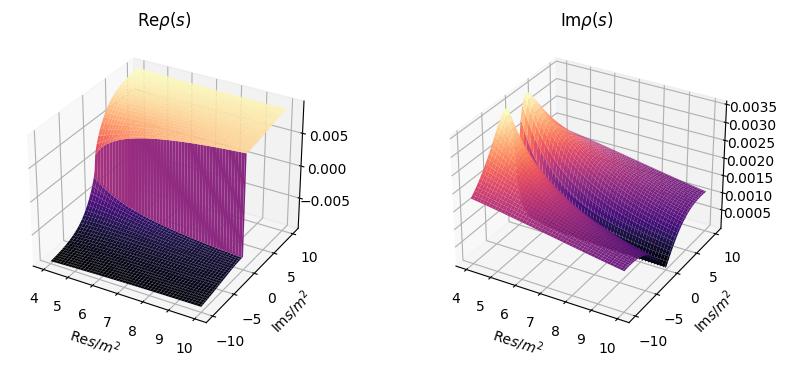

In [38]:
X, Y = np.meshgrid(np.linspace(4, 10, 100), np.linspace(-10, 10, 100))
Z = X + 1j*Y

fig, ax = plt.subplots(nrows = 1, ncols = 2, subplot_kw = {"projection" : "3d"}, figsize = (10,4))
ax[0].plot_surface(X, Y, np.real(rho(Z)), cmap = "magma")
ax[1].plot_surface(X, Y, np.imag(rho(Z)), cmap = "magma")
ax[0].set_xlabel(r"Re$s/m^2$")
ax[0].set_ylabel(r"Im$s/m^2$")
ax[1].set_xlabel(r"Re$s/m^2$")
ax[1].set_ylabel(r"Im$s/m^2$")
ax[0].set_title(r"Re$\rho(s)$")
ax[1].set_title(r"Im$\rho(s)$")

Note that the result $\rho(s+i\epsilon)=-\rho(s-i\epsilon)$ is only valid in the small $\epsilon$ limit. In this limit, the imaginary part of $\rho$ is 0, so that this is still valid, even though the graphs above suggest that for finite $\epsilon$ we really have $Im\rho(s+i\epsilon)=Im(\rho(s-i\epsilon))$

### 4

Text(0.5, 0.98, '$m_0=2.5m$ and $g_0=3.0$')

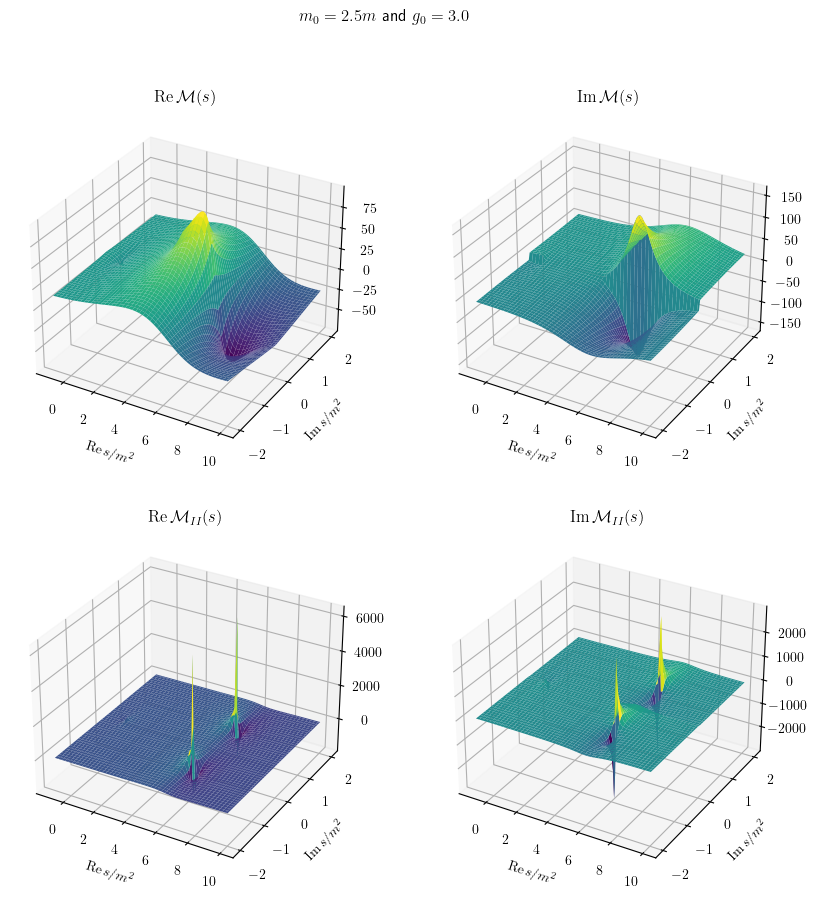

In [134]:
def amplitudeII(s, Kmatrix):
    return amplitude(s, Kmatrix)/(1+2j*rho(s)*amplitude(s, Kmatrix))

X, Y = np.meshgrid(np.linspace(-1, 10, 100), np.linspace(-2, 2, 100))
Z = X + 1j*Y
m0 = 2.5
g0 = 3.0
fig, ax = plt.subplots(nrows = 2, ncols = 2, subplot_kw = {"projection" : "3d"}, figsize = (10,10))
ax[0,0].plot_surface(X, Y, np.real(amplitude(Z, lambda s : K_breit_wigner(s, m0, g0))), cmap = "viridis")
ax[1,0].plot_surface(X, Y, np.real(amplitudeII(Z, lambda s : K_breit_wigner(s, m0, g0))), cmap = "viridis")
ax[0,1].plot_surface(X, Y, np.imag(amplitude(Z, lambda s : K_breit_wigner(s, m0, g0))), cmap = "viridis")
ax[1,1].plot_surface(X, Y, np.imag(amplitudeII(Z, lambda s : K_breit_wigner(s, m0, g0))), cmap = "viridis")
ax[0,0].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[0,0].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[1,0].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[1,0].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[0,1].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[0,1].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[1,1].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[1,1].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[0,0].set_title(r"$\operatorname{Re}\mathcal{M}(s)$")
ax[1,0].set_title(r"$\operatorname{Re}\mathcal{M}_{II}(s)$")
ax[0,1].set_title(r"$\operatorname{Im}\mathcal{M}(s)$")
ax[1,1].set_title(r"$\operatorname{Im}\mathcal{M}_{II}(s)$")

fig.suptitle(r"$m_0={}m$ and $g_0={}$".format(m0, g0))

Note that the first Riemann sheet amplitude itself doesn't have the poles in the second sheet amplitude. Therefore, the poles must correspond to zeroes in the denominator. Accordingly, to find them we can use something like Newton's method. These poles are therefore resonant states.

Text(0.5, 0.98, 'Pole is at $s_p = (6.1341893938562775+0.9049305231374465j)$ \\\\ where the denominator has a value of $1.1102230246251565e-16j$ \\\\ and the residue is $c_p=(-1.4509672350211226e-07+1.724099292944086e-08j)$')

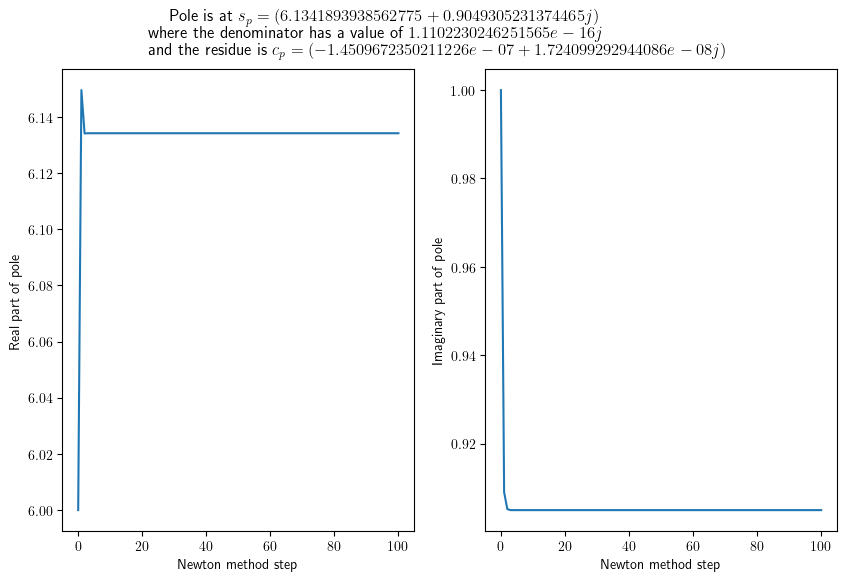

In [172]:
def amplitudeII_denominator(s, Kmatrix):
    return 1 + 2j*rho(s)*amplitude(s, Kmatrix)

# K matrix for amplitude we are interested in
m0 = 2.5
g0 = 3.0
K = lambda s : K_breit_wigner(s, m0, g0)

# Number of steps in Newton's method
N = 100

# Step size in derivative
delta = 10e-3 

# Initial guess
pole = np.array([6 + 1j])


# Implementation of Newton's method
for n in range(N):
    pole = np.append(pole, pole[-1] - delta/((amplitudeII_denominator(pole[-1] + delta, K)/amplitudeII_denominator(pole[-1], K))-1))
    
# Finding the residue

final_pole = pole[-1]
length = 0.5
Num = 1000000
side_1 = final_pole - length/2 - 1j*length/2 + np.linspace(0, length, Num)
side_2 = side_1[-1] + 1j*np.linspace(0, length, Num)
side_3 = side_2[-1] - np.linspace(0, length, Num)
side_4 = side_3[-1] - 1j*np.linspace(0, length, Num)
residue = 0
for n in range(Num):
    residue = residue + ((amplitude(side_1[n], K)-amplitude(side_3[n], K)+1j*amplitude(side_2[n], K)-1j*amplitude(side_4[n], K))*length/Num)
residue = residue/(2j*np.pi)
    
# Reporting the results
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
ax[0].plot(range(N+1), np.real(pole))
ax[0].set_xlabel("Newton method step")
ax[0].set_ylabel("Real part of pole")
ax[1].plot(range(N+1), np.imag(pole))
ax[1].set_xlabel("Newton method step")
ax[1].set_ylabel("Imaginary part of pole")
fig.suptitle(r"Pole is at $s_p = {}$ \\ where the denominator has a value of ${}$ \\ and the residue is $c_p={}$".format(final_pole, amplitudeII_denominator(final_pole, K), residue))

Now let us find the other pole in the second Riemann sheet

Text(0.5, 0.98, 'Pole is at $s = (6.1341893938562775-0.9049305231374465j)$ \\\\ where the denominator has a value of $-1.1102230246251565e-16j$')

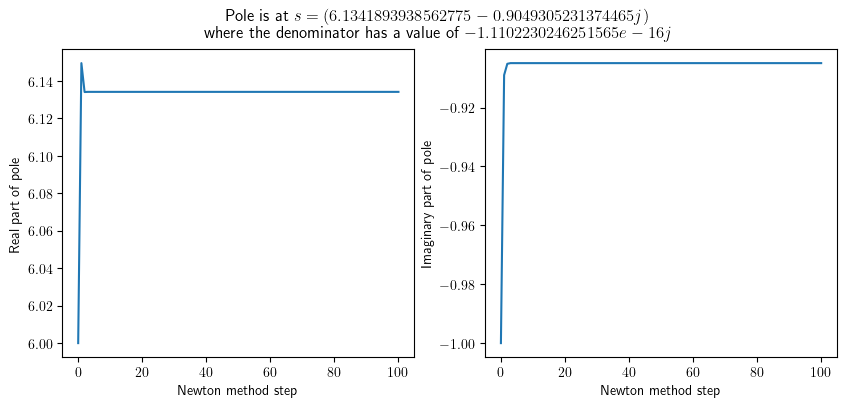

In [131]:
def amplitudeII_denominator(s, Kmatrix):
    return 1 + 2j*rho(s)*amplitude(s, Kmatrix)

# K matrix for amplitude we are interested in
m0 = 2.5
g0 = 3.0
K = lambda s : K_breit_wigner(s, m0, g0)

# Number of steps in Newton's method
N = 100

# Step size in derivative
delta = 10e-3 

# Initial guess
pole = np.array([6 - 1j])

for n in range(N):
    pole = np.append(pole, pole[-1] - delta/((amplitudeII_denominator(pole[-1] + delta, K)/amplitudeII_denominator(pole[-1], K))-1))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].plot(range(N+1), np.real(pole))
ax[0].set_xlabel("Newton method step")
ax[0].set_ylabel("Real part of pole")
ax[1].plot(range(N+1), np.imag(pole))
ax[1].set_xlabel("Newton method step")
ax[1].set_ylabel("Imaginary part of pole")
fig.suptitle(r"Pole is at $s = {}$ \\ where the denominator has a value of ${}$".format(pole[-1], amplitudeII_denominator(pole[-1], K)))

### 5

Text(0.5, 0.98, '$ma=2$ and $mr=0$')

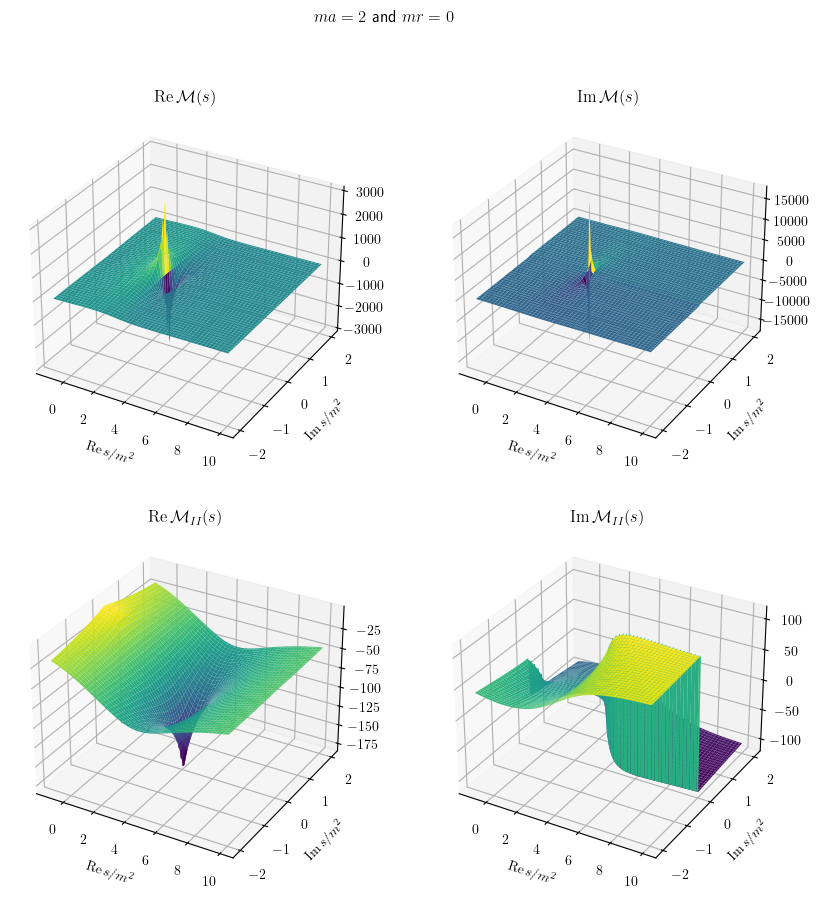

In [133]:
def amplitudeII(s, Kmatrix):
    return amplitude(s, Kmatrix)/(1+2j*rho(s)*amplitude(s, Kmatrix))

X, Y = np.meshgrid(np.linspace(-1, 10, 100), np.linspace(-2, 2, 100))
Z = X + 1j*Y
a = 2
r = 0
fig, ax = plt.subplots(nrows = 2, ncols = 2, subplot_kw = {"projection" : "3d"}, figsize = (10,10))
ax[0,0].plot_surface(X, Y, np.real(amplitude(Z, lambda s : K_eff_range(s, a, r))), cmap = "viridis")
ax[1,0].plot_surface(X, Y, np.real(amplitudeII(Z, lambda s : K_eff_range(s, a, r))), cmap = "viridis")
ax[0,1].plot_surface(X, Y, np.imag(amplitude(Z, lambda s : K_eff_range(s, a, r))), cmap = "viridis")
ax[1,1].plot_surface(X, Y, np.imag(amplitudeII(Z, lambda s : K_eff_range(s, a, r))), cmap = "viridis")
ax[0,0].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[0,0].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[1,0].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[1,0].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[0,1].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[0,1].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[1,1].set_xlabel(r"$\operatorname{Re}s/m^2$")
ax[1,1].set_ylabel(r"$\operatorname{Im}s/m^2$")
ax[0,0].set_title(r"$\operatorname{Re}\mathcal{M}(s)$")
ax[1,0].set_title(r"$\operatorname{Re}\mathcal{M}_{II}(s)$")
ax[0,1].set_title(r"$\operatorname{Im}\mathcal{M}(s)$")
ax[1,1].set_title(r"$\operatorname{Im}\mathcal{M}_{II}(s)$")
fig.suptitle(r"$ma={}$ and $mr={}$".format(a, r))

We now see that we have bound states and virtual states, but no resonances. This introduces an issue. We can still find the virtual state pole using the trick above because there is no bound state at the same place. Let us begin by finding the virtual state 

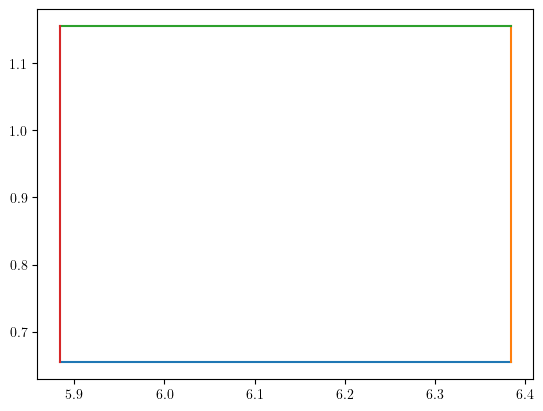

In [161]:
plt.plot(np.real(side_1), np.imag(side_1))
plt.plot(np.real(side_2), np.imag(side_2))
plt.plot(np.real(side_3), np.imag(side_3))
plt.plot(np.real(side_4), np.imag(side_4))